In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,mean_squared_error, mean_absolute_error, r2_score # Importing necessary metrics
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer



In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

In [ ]:
df = pd.get_dummies(df, columns=['Sex','Embarked'], drop_first=True)

df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,True


In [ ]:

## now lets remove inwanted columns like name, tickets, cabins
df.drop(['name','ticket','cabin'],axis=1,inplace=True, errors='ignore') # Adding axis=1 to specify columns and errors='ignore' to avoid KeyError if any column is not found

In [ ]:
## lets do eda
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,True


In [ ]:
df.columns = df.columns.str.lower()


In [ ]:
df.head()

,passengerid,survived,pclass,name,age,sibsp,parch,ticket,fare,cabin,sex_male,embarked_q,embarked_s
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,True


In [ ]:
df.isna()

,passengerid,survived,pclass,name,age,sibsp,parch,ticket,fare,cabin,sex_male,embarked_q,embarked_s
0,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,True,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isna().sum()

,0
passengerid,0
survived,0
pclass,0
name,0
age,177
sibsp,0
parch,0
ticket,0
fare,0
cabin,687


In [ ]:
## there are couple of missing values so we gonna drop them first
df.dropna(inplace=True)

In [ ]:
df.head()

,passengerid,survived,pclass,name,age,sibsp,parch,ticket,fare,cabin,sex_male,embarked_q,embarked_s
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,True,False,True
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",4.0,1,1,PP 9549,16.7000,G6,False,False,True
11,12,1,1,"Bonnell, Miss. Elizabeth",58.0,0,0,113783,26.5500,C103,False,False,True


In [ ]:
df.isna().sum()

,0
passengerid,0
survived,0
pclass,0
name,0
age,0
sibsp,0
parch,0
ticket,0
fare,0
cabin,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185 entries, 1 to 889
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  185 non-null    int64  
 1   survived     185 non-null    int64  
 2   pclass       185 non-null    int64  
 3   name         185 non-null    object 
 4   age          185 non-null    float64
 5   sibsp        185 non-null    int64  
 6   parch        185 non-null    int64  
 7   ticket       185 non-null    object 
 8   fare         185 non-null    float64
 9   cabin        185 non-null    object 
 10  sex_male     185 non-null    bool   
 11  embarked_q   185 non-null    bool   
 12  embarked_s   185 non-null    bool   
dtypes: bool(3), float64(2), int64(5), object(3)
memory usage: 16.4+ KB


In [ ]:
df.size

2405

In [ ]:
df.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,455.264865,0.675676,1.189189,35.829297,0.459459,0.470270,78.696712
std,248.948244,0.469392,0.512763,15.679356,0.642456,0.752122,75.931898
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.000000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,680.000000,1.000000,1.000000,48.000000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185 entries, 1 to 889
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  185 non-null    int64  
 1   survived     185 non-null    int64  
 2   pclass       185 non-null    int64  
 3   name         185 non-null    object 
 4   age          185 non-null    float64
 5   sibsp        185 non-null    int64  
 6   parch        185 non-null    int64  
 7   ticket       185 non-null    object 
 8   fare         185 non-null    float64
 9   cabin        185 non-null    object 
 10  sex_male     185 non-null    bool   
 11  embarked_q   185 non-null    bool   
 12  embarked_s   185 non-null    bool   
dtypes: bool(3), float64(2), int64(5), object(3)
memory usage: 16.4+ KB


In [ ]:
df.shape

(185, 13)

In [ ]:
## lets train the model now, im creating a function so that i can not only train but also find the errors
def train_model(X_train,X_test,y_train,y_test,model):
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  ## lets check the probability of predictions just in case
  y_prob=model.predict_prob(X_test)[:,1] if hasattr(model,"predict_prob") else None
  accuracy=accuracy_score(y_test,y_pred)
  report=classification_report(y_test,y_pred)
  confusion=confusion_matrix(y_test,y_pred)

  ## errors an devalustion
  mse=mean_squared_error(y_test,y_pred)
  mae=mean_absolute_error(y_test,y_pred)
  r2=r2_score(y_test,y_pred)
  return y_pred, y_prob, model, mse, mae, r2

In [ ]:
##  make function for confusion matrix


def plot_confusion_matrix(y_test,y_pred):
  cm=confusion_matrix(y_test,y_pred)
  plt.figure(figsize=(6,4))
  sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',cbar=False)
  plt.xlabel('Predicted')
  plt.ylabel("Actual")
  st.pyplot




In [ ]:
## now a function to plot roc curve


def plot_roc_curve(y0test,y_pred_prob):
  if y_prob is not None:
    fpr,tpr,_=roc_curve(y_test,y_prob)
    roc_auc=auc(fpr,tpr)
    plt.plot(fpr,tpr,color='blue',lw=2,label=f'AUC={roc_auc:.2f}')
    plt.plot([0,1],[0,1],color='red',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='lower right')
    st.pyplot(plt)

In [ ]:
## now lets create a gui using streamlit to make it look better

st.title("Titanic Survival Prediction, by slecting the best model ")
data= df
st.write(df.head())

2025-03-10 03:51:13.390 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-10 03:51:13.862 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-03-10 03:51:13.866 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-10 03:51:13.936 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-10 03:51:13.938 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [ ]:
df.drop(['name','ticket','cabin'],axis=1,inplace=True, errors='ignore') # Adding axis=1 to specify columns and errors='ignore' to avoid KeyError if any column is not found

In [ ]:
X=df.drop('survived',axis=1)
y=df['survived']

In [ ]:
X.head()

,passengerid,pclass,age,sibsp,parch,fare,sex_male,embarked_q,embarked_s
1,2,1,38.0,1,0,71.2833,False,False,False
3,4,1,35.0,1,0,53.1000,False,False,True
6,7,1,54.0,0,0,51.8625,True,False,True
10,11,3,4.0,1,1,16.7000,False,False,True
11,12,1,58.0,0,0,26.5500,False,False,True


In [ ]:
X.isna().sum()

,0
passengerid,0
pclass,0
age,0
sibsp,0
parch,0
fare,0
sex_male,0
embarked_q,0
embarked_s,0


In [ ]:
y.head()

,survived
1,1
3,1
6,0
10,1
11,1


In [ ]:

## lets train the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# lets convert categorical values into numerical using one hot encoding
categorical_feature=['sex']
numerical_feature=[col for col in X.columns if col not in categorical_feature]



In [ ]:
prepocessor= ColumnTransformer(
    transformers=[
        ('num',StandardScaler(), numerical_feature),
        ('cat',OneHotEncoder(sparse_output=False, handle_unknown='ignore'),categorical_feature) # Modify OneHotEncoder
    ]
)

In [ ]:
## so from the aboce we see we have string values so we need to use on

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier()
}

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185 entries, 1 to 889
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  185 non-null    int64  
 1   survived     185 non-null    int64  
 2   pclass       185 non-null    int64  
 3   age          185 non-null    float64
 4   sibsp        185 non-null    int64  
 5   parch        185 non-null    int64  
 6   fare         185 non-null    float64
 7   sex_male     185 non-null    bool   
 8   embarked_q   185 non-null    bool   
 9   embarked_s   185 non-null    bool   
dtypes: bool(3), float64(2), int64(5)
memory usage: 12.1 KB


In [ ]:
result={}

In [ ]:
encoder = OneHotEncoder(sparse_output=False)

In [ ]:
## lets select the best model for our data set

## lets select the best model for our data set
models = {  # Redefine models dictionary here
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier()
}

result = {}  # Initialize an empty dictionary to store results

for name, model in models.items():  # Iterate using model instead of models
    y_pred, y_prob, trained_model, mse, mae,r2 = train_model(X_train, X_test, y_train, y_test, model)
    acc = accuracy_score(y_test, y_pred)
    result[name] = (acc, y_pred, y_prob, mse, mae)

best_model = max(result, key=lambda k: result[k][0])
best_acc, best_y_pred, best_y_prob, best_mse, best_mae = result[best_model]







/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


2025-03-10 03:51:15.400 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-10 03:51:15.401 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-10 03:51:15.402 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-10 03:51:15.406 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-10 03:51:15.408 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-10 03:51:15.410 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-10 03:51:15.412 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-10 03:51:15.413 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

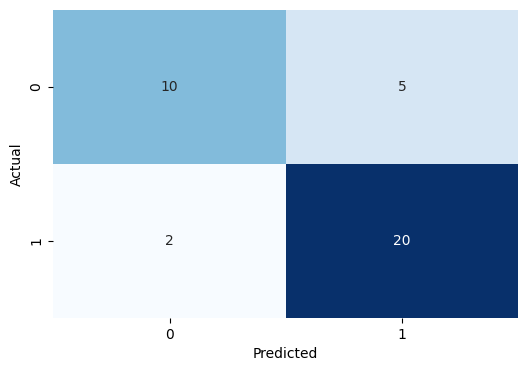

In [ ]:
st.write(f"### Best Model: {best_model} with Accuracy: {best_acc:.2f}")
st.write(f"### Mean Squared Error: {best_mse:.4f}")
st.write(f"### Mean Absolute Error: {best_mae:.4f}")
st.write("### Classification Report")
st.text(classification_report(y_test, best_y_pred))
plot_confusion_matrix(y_test, best_y_pred)
plot_roc_curve(y_test, best_y_prob)




## display the results for all the models


st.write("### Model Results:")
for name, (acc, _,_, mse, mae) in result.items():
    st.write(f"{name}: Accuracy={acc:.2f}, MSE={mse:.4f}, MAE={mae:.4f}")

In [ ]:
print(best_model)

Logistic Regression


2025-03-10 03:51:16.359 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-10 03:51:16.361 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-10 03:51:16.362 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-10 03:51:16.363 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-10 03:51:16.365 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-10 03:51:16.366 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-10 03:51:16.366 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-10 03:51:16.367 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

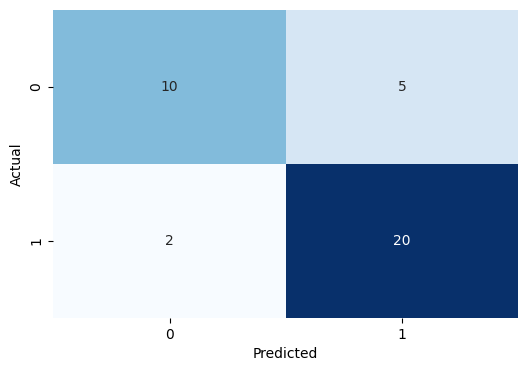

In [ ]:

model = LogisticRegression(max_iter=1000)
y_pred, y_prob, trained_model, mse, mar, r2= train_model(X_train, X_test, y_train, y_test,model)
acc = accuracy_score(y_test, y_pred)

# Display results
st.write(f"### Logistic Regression Accuracy: {acc:.2f}")
st.write(f"### Mean Squared Error: {mse:.4f}")
st.write(f"### Mean Absolute Error: {mae:.4f}")
st.write("### Classification Report")
st.text(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)
plot_roc_curve(y_test, y_prob)


In [ ]:
print(acc)

0.8108108108108109
